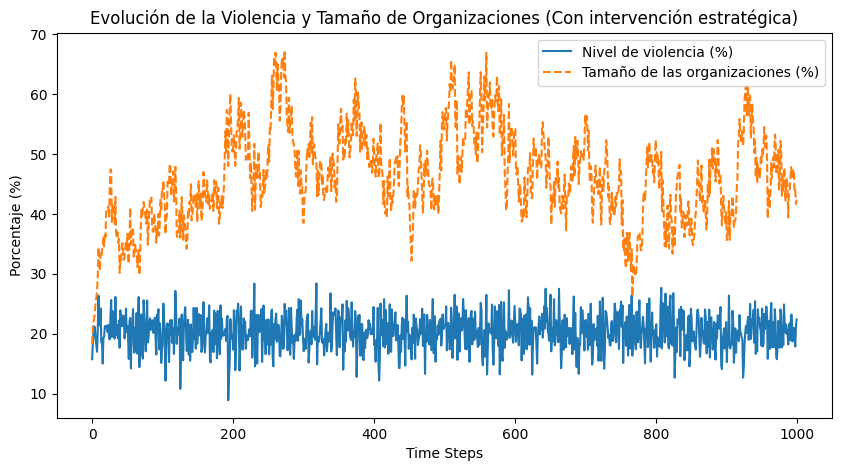

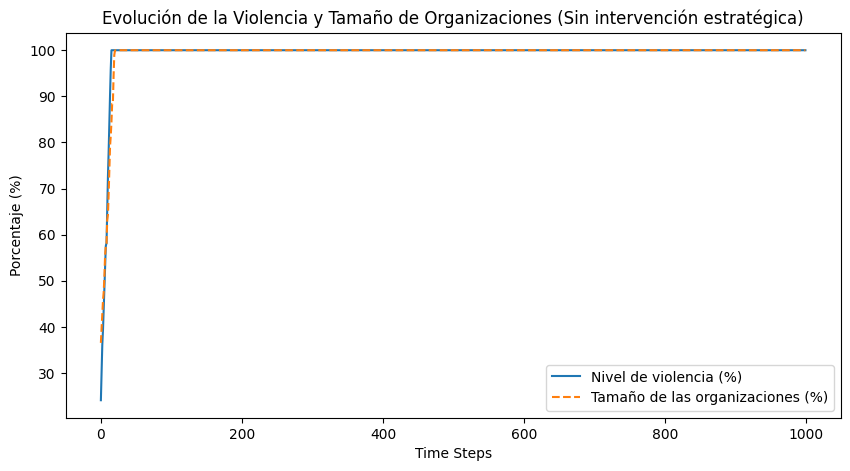

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import random

class CriminalGroup:
    """Representa un grupo criminal con fuerza y agresividad, incorporando ruido aleatorio."""

    def __init__(self, unique_id, selective_dismantling):
        self.unique_id = unique_id
        self.strength = np.random.randint(5, 20) + np.random.normal(0, 3)  # Ruido inicial en fuerza
        self.aggression = np.random.randint(1, 10) + np.random.normal(0, 2)  # Ruido inicial en agresividad
        self.selective_dismantling = selective_dismantling

    def step(self):
        """Define el comportamiento del grupo en cada paso con ruido adicional."""
        noise_strength = np.random.normal(0, 2)  # Ruido en fuerza
        noise_aggression = np.random.normal(0, 1.5)  # Ruido en agresividad

        if self.selective_dismantling and self.aggression > 5:
            self.strength *= max(0.8 + noise_strength / 20, 0.5)
            self.aggression *= max(0.5 + noise_aggression / 10, 0.2)
        else:
            self.strength += max(1 + noise_strength, 0)
            self.aggression += max(1 + noise_aggression / 2, 0)

class CrimeModel:
    """Simula la competencia criminal con intervención estratégica opcional y ruido aleatorio."""

    def __init__(self, num_groups, selective_dismantling, max_organization_size=200, max_violence_level=100):
        self.agents = [CriminalGroup(i, selective_dismantling) for i in range(num_groups)]
        self.violence_levels = []
        self.organization_sizes = []
        self.selective_dismantling = selective_dismantling
        self.max_organization_size = max_organization_size
        self.max_violence_level = max_violence_level

    def step(self):
        """Ejecuta un paso de simulación con activación aleatoria y ruido en el orden."""
        random.shuffle(self.agents)  # Activa agentes aleatoriamente
        for agent in self.agents:
            agent.step()

        # Calcular valores normalizados como porcentaje
        total_violence = sum(agent.aggression for agent in self.agents)
        total_size = sum(agent.strength for agent in self.agents)

        violence_percentage = (total_violence / self.max_violence_level) * 100
        size_percentage = (total_size / self.max_organization_size) * 100

        self.violence_levels.append(min(violence_percentage, 100))  # Limitar a 100%
        self.organization_sizes.append(min(size_percentage, 100))  # Limitar a 100%

def run_simulation(steps, num_groups, selective_dismantling):
    """Ejecuta la simulación y grafica los valores normalizados en porcentaje."""
    model = CrimeModel(num_groups, selective_dismantling)

    for _ in range(steps):
        model.step()

    label = "Con intervención estratégica" if selective_dismantling else "Sin intervención estratégica"

    # Graficamos la evolución de violencia y tamaño de organizaciones en porcentaje
    plt.figure(figsize=(10, 5))
    plt.plot(model.violence_levels, label="Nivel de violencia (%)")
    plt.plot(model.organization_sizes, label="Tamaño de las organizaciones (%)", linestyle="dashed")

    plt.xlabel("Time Steps")
    plt.ylabel("Porcentaje (%)")
    plt.title(f"Evolución de la Violencia y Tamaño de Organizaciones ({label})")
    plt.legend()
    plt.show()

# Ejecutar simulación con y sin intervención
run_simulation(1000, 5, True)  # Con intervención estratégica
run_simulation(1000, 5, False) # Sin intervención estratégica

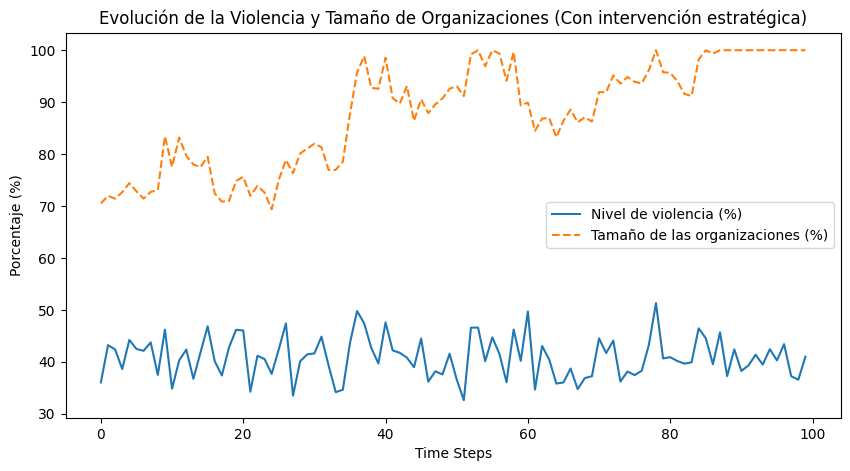

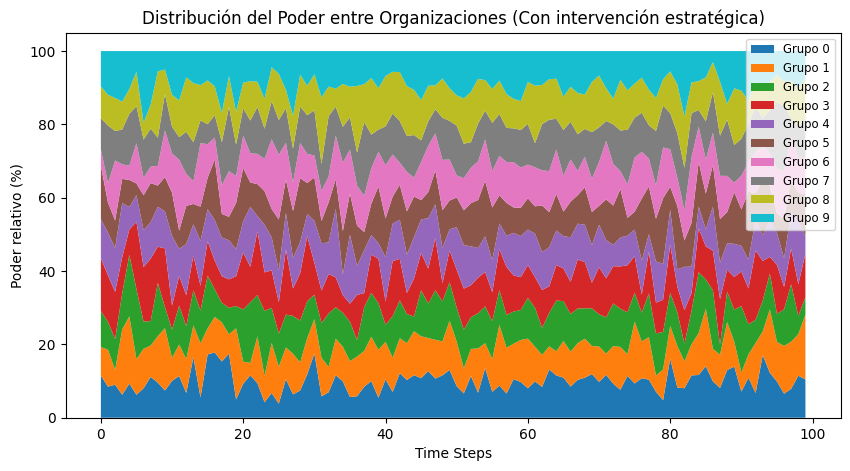

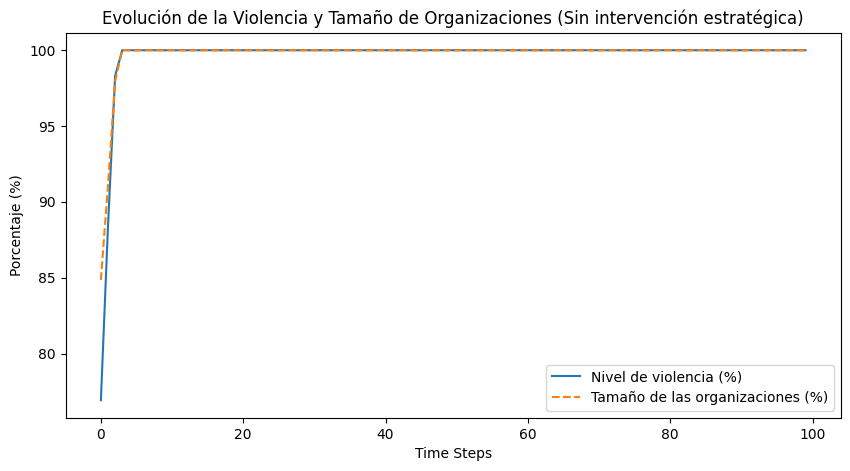

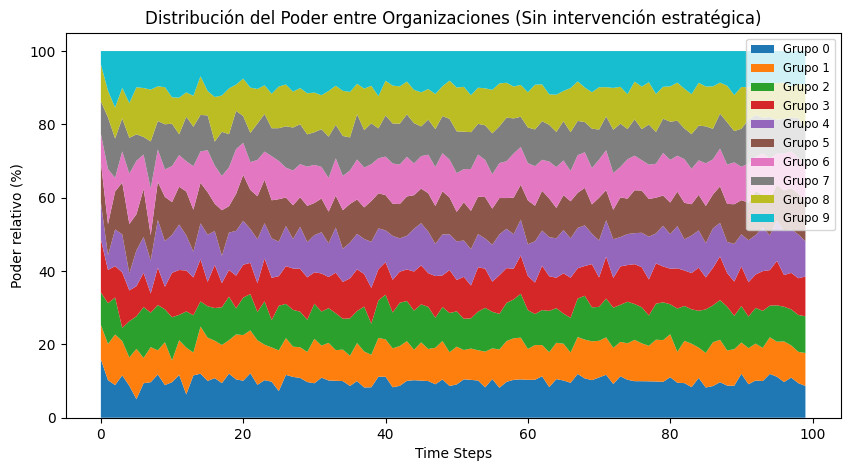

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import random

class CriminalGroup:
    """Representa un grupo criminal con fuerza y agresividad, incorporando ruido aleatorio."""

    def __init__(self, unique_id, selective_dismantling):
        self.unique_id = unique_id
        self.strength = np.random.randint(5, 20) + np.random.normal(0, 3)  # Ruido inicial en fuerza
        self.aggression = np.random.randint(1, 10) + np.random.normal(0, 2)  # Ruido inicial en agresividad
        self.selective_dismantling = selective_dismantling

    def step(self):
        """Define el comportamiento del grupo en cada paso con ruido adicional."""
        noise_strength = np.random.normal(0, 2)  # Ruido en fuerza
        noise_aggression = np.random.normal(0, 1.5)  # Ruido en agresividad

        if self.selective_dismantling and self.aggression > 5:
            self.strength *= max(0.8 + noise_strength / 20, 0.5)
            self.aggression *= max(0.5 + noise_aggression / 10, 0.2)
        else:
            self.strength += max(1 + noise_strength, 0)
            self.aggression += max(1 + noise_aggression / 2, 0)

class CrimeModel:
    """Simula la competencia criminal con intervención estratégica opcional y ruido aleatorio."""

    def __init__(self, num_groups, selective_dismantling):
        self.agents = [CriminalGroup(i, selective_dismantling) for i in range(num_groups)]
        self.violence_levels = []
        self.organization_sizes = []
        self.power_distribution = []  # Nuevo: almacenamiento del poder relativo de cada grupo
        self.selective_dismantling = selective_dismantling

    def step(self):
        """Ejecuta un paso de simulación con activación aleatoria y ruido en el orden."""
        random.shuffle(self.agents)  # Activa agentes aleatoriamente
        for agent in self.agents:
            agent.step()

        # Calcular valores agregados
        total_violence = sum(agent.aggression for agent in self.agents)
        total_size = sum(agent.strength for agent in self.agents)

        # Normalizar a porcentaje
        max_organization_size = 200  # Tamaño máximo (ajustable)
        max_violence_level = 100  # Nivel máximo de violencia

        violence_percentage = min((total_violence / max_violence_level) * 100, 100)
        size_percentage = min((total_size / max_organization_size) * 100, 100)

        self.violence_levels.append(violence_percentage)
        self.organization_sizes.append(size_percentage)

        # Calcular poder relativo de cada organización en porcentaje
        if total_size > 0:
            power_relative = [agent.strength / total_size * 100 for agent in self.agents]
        else:
            power_relative = [0] * len(self.agents)  # Evitar divisiones por cero

        self.power_distribution.append(power_relative)

def run_simulation(steps, num_groups, selective_dismantling):
    """Ejecuta la simulación y grafica los valores normalizados en porcentaje y distribución de poder."""
    model = CrimeModel(num_groups, selective_dismantling)

    for _ in range(steps):
        model.step()

    label = "Con intervención estratégica" if selective_dismantling else "Sin intervención estratégica"

    # Gráfico de evolución de violencia y tamaño de organizaciones
    plt.figure(figsize=(10, 5))
    plt.plot(model.violence_levels, label="Nivel de violencia (%)")
    plt.plot(model.organization_sizes, label="Tamaño de las organizaciones (%)", linestyle="dashed")
    plt.xlabel("Time Steps")
    plt.ylabel("Porcentaje (%)")
    plt.title(f"Evolución de la Violencia y Tamaño de Organizaciones ({label})")
    plt.legend()
    plt.show()

    # Gráfico de poder relativo de cada organización en un gráfico de área apilada
    plt.figure(figsize=(10, 5))
    power_data = np.array(model.power_distribution).T  # Transponer datos para graficar correctamente
    plt.stackplot(range(steps), *power_data, labels=[f"Grupo {i}" for i in range(num_groups)])

    plt.xlabel("Time Steps")
    plt.ylabel("Poder relativo (%)")
    plt.title(f"Distribución del Poder entre Organizaciones ({label})")
    plt.legend(loc="upper right", fontsize="small")
    plt.show()

# Ejecutar simulación con y sin intervención
run_simulation(100, 10, True)  # Con intervención estratégica
run_simulation(100, 10, False) # Sin intervención estratégica

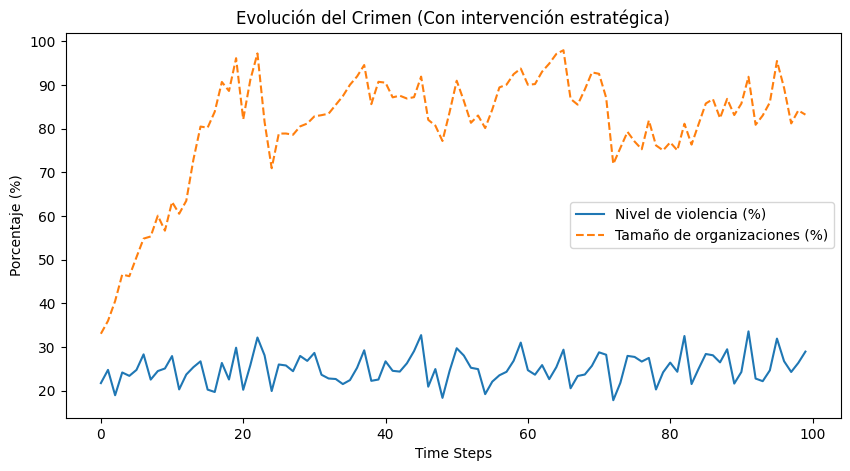

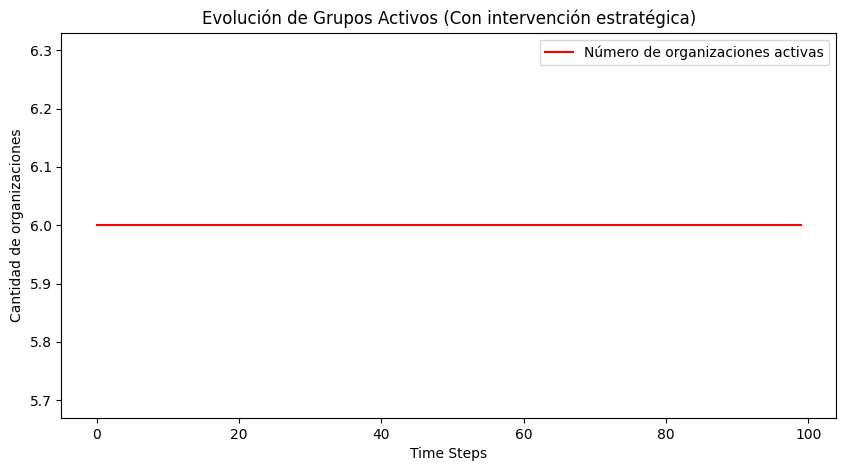

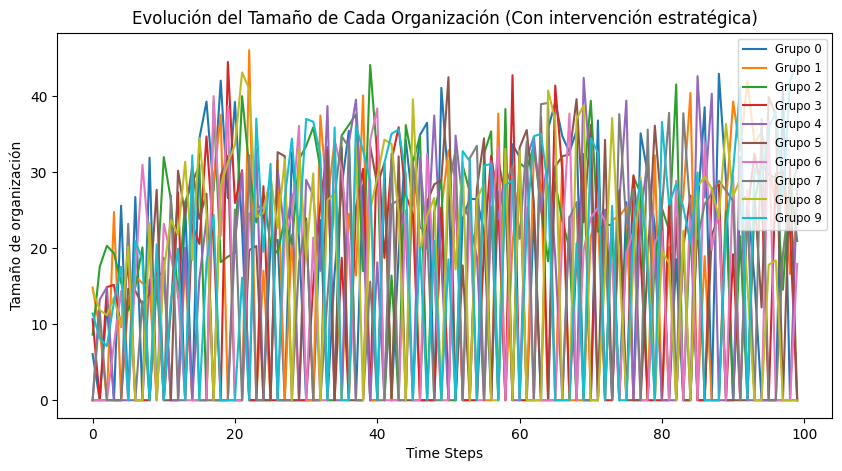

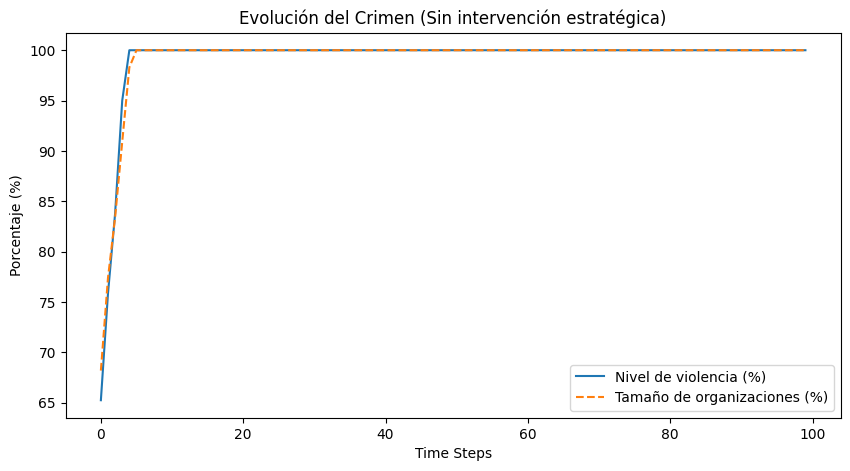

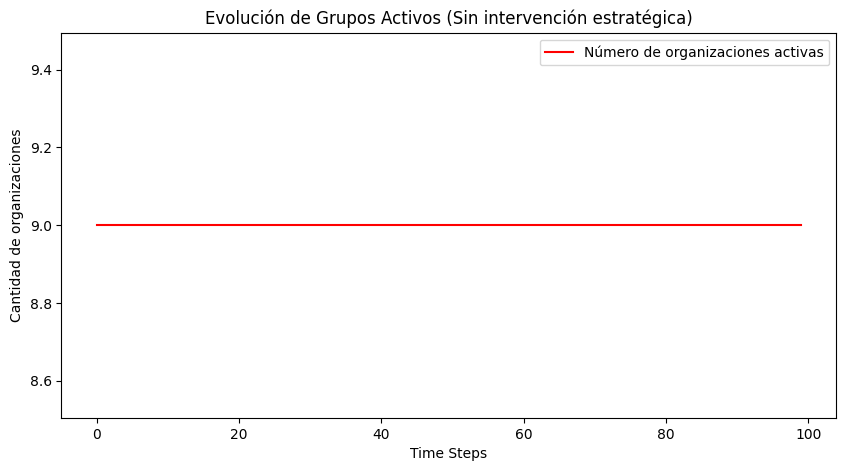

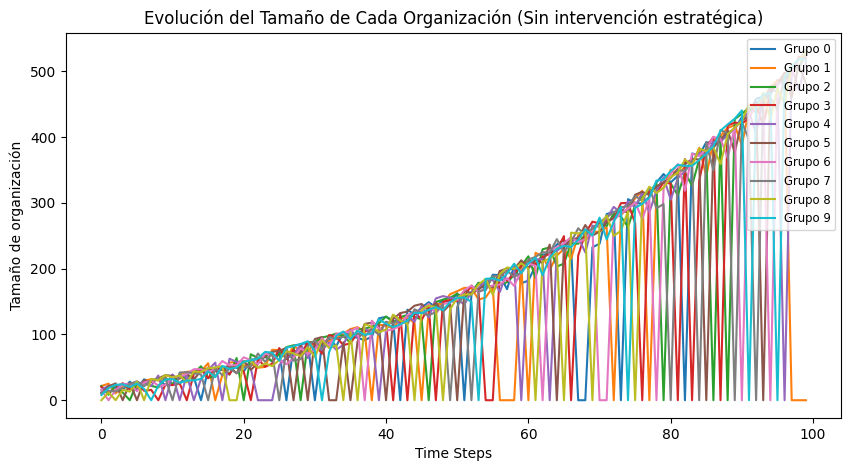

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import random

class CriminalGroup:
    """Representa un grupo criminal con posibilidad de desaparecer o absorber a otros."""

    def __init__(self, unique_id, selective_dismantling):
        self.unique_id = unique_id
        self.strength = np.random.randint(5, 20) + np.random.normal(0, 3)  # Fuerza inicial con ruido
        self.aggression = np.random.randint(1, 10) + np.random.normal(0, 2)  # Agresividad inicial con ruido
        self.selective_dismantling = selective_dismantling
        self.alive = True  # Estado de la organización

    def step(self):
        """Define el comportamiento del grupo, incluyendo desaparición o absorción."""
        if not self.alive:
            return

        noise_strength = np.random.normal(0, 2)
        noise_aggression = np.random.normal(0, 1.5)

        if self.selective_dismantling and self.aggression > 5:
            self.strength *= max(0.8 + noise_strength / 20, 0.5)
            self.aggression *= max(0.5 + noise_aggression / 10, 0.2)
        else:
            self.strength += max(1 + noise_strength, 0)
            self.aggression += max(1 + noise_aggression / 2, 0)

        # Verificar si el grupo es demasiado débil para sobrevivir
        if self.strength < 3 or self.aggression < 1:
            self.alive = False  # Marcamos la organización como desaparecida

class CrimeModel:
    """Simula la competencia criminal con fusiones y desapariciones de organizaciones."""

    def __init__(self, num_groups, selective_dismantling):
        self.agents = [CriminalGroup(i, selective_dismantling) for i in range(num_groups)]
        self.violence_levels = []
        self.organization_sizes = []
        self.num_active_groups = []
        self.individual_sizes = [[] for _ in range(num_groups)]  # Nuevo: registrar tamaño por organización
        self.selective_dismantling = selective_dismantling

    def step(self):
        """Ejecuta un paso de simulación con absorción y desaparición de organizaciones."""
        random.shuffle(self.agents)
        for agent in self.agents:
            agent.step()

        # Filtrar grupos vivos
        alive_agents = [agent for agent in self.agents if agent.alive]

        # Redistribuir poder de grupos eliminados
        if len(alive_agents) > 0:
            total_strength = sum(agent.strength for agent in alive_agents)
            for agent in alive_agents:
                agent.strength += (total_strength / len(alive_agents)) * 0.02  # Pequeña redistribución

        # Guardar valores normalizados
        max_organization_size = 200
        max_violence_level = 100

        total_violence = sum(agent.aggression for agent in alive_agents)
        total_size = sum(agent.strength for agent in alive_agents)

        violence_percentage = min((total_violence / max_violence_level) * 100, 100)
        size_percentage = min((total_size / max_organization_size) * 100, 100)

        self.violence_levels.append(violence_percentage)
        self.organization_sizes.append(size_percentage)
        self.num_active_groups.append(len(alive_agents))

        # Registrar el tamaño de cada organización individual
        for i, agent in enumerate(self.agents):
            if agent.alive:
                self.individual_sizes[i].append(agent.strength)
            else:
                self.individual_sizes[i].append(0)  # Si desapareció, registramos tamaño 0

def run_simulation(steps, num_groups, selective_dismantling):
    """Ejecuta la simulación y grafica la evolución de violencia, tamaño de organizaciones y grupos activos."""
    model = CrimeModel(num_groups, selective_dismantling)

    for _ in range(steps):
        model.step()

    label = "Con intervención estratégica" if selective_dismantling else "Sin intervención estratégica"

    # Gráfico de evolución de violencia y tamaño de organizaciones
    plt.figure(figsize=(10, 5))
    plt.plot(model.violence_levels, label="Nivel de violencia (%)")
    plt.plot(model.organization_sizes, label="Tamaño de organizaciones (%)", linestyle="dashed")
    plt.xlabel("Time Steps")
    plt.ylabel("Porcentaje (%)")
    plt.title(f"Evolución del Crimen ({label})")
    plt.legend()
    plt.show()

    # Gráfico de cantidad de grupos sobrevivientes
    plt.figure(figsize=(10, 5))
    plt.plot(model.num_active_groups, label="Número de organizaciones activas", color="red")
    plt.xlabel("Time Steps")
    plt.ylabel("Cantidad de organizaciones")
    plt.title(f"Evolución de Grupos Activos ({label})")
    plt.legend()
    plt.show()

    # Gráfico de evolución del tamaño de cada organización individual
    plt.figure(figsize=(10, 5))
    for i in range(num_groups):
        plt.plot(model.individual_sizes[i], label=f"Grupo {i}")

    plt.xlabel("Time Steps")
    plt.ylabel("Tamaño de organización")
    plt.title(f"Evolución del Tamaño de Cada Organización ({label})")
    plt.legend(loc="upper right", fontsize="small")
    plt.show()

# Ejecutar simulación con y sin intervención
run_simulation(100, 10, True)  # Con intervención estratégica
run_simulation(100, 10, False) # Sin intervención estratégica